<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#2874A6;font-size:110%;text-align:left">
<a id=toc></a>
<h1 style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-size: 100% auto;background-position: 0px 0px; 
"><span style='color:white'><b>CAR🚗 PRICE💲 PREDICTION📈</b></span></h1>

<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#Model PerformanceModel Performance;font-size:110%;text-align:left">
    
<h2><span style="text-align:center; font-weight:bolder; color:navy">Table of Contents:</span></h2> 
<p>
    
<a id="toc"></a>
- [1. Import Libraries](#1)
- [2. Data Loading](#2)
- [3. EDA](#3) 
- [4. Model building And Evaluation](#4)
   - [4.1 Random Forest Regressor](#4.1) 
   - [4.2 Gradient Boosting](#4.2)
   - [4.4 Stacked Ensemble Model](#4.3)
   - [4.3 Xtreme Gradient Boosting](#4.4)
- [5. Model Scores](#5)  

<a name="1"></a>
# **<h1 id="1" style="background-color:#2874A6;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">Import Libraries</h1>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

<a name="2"></a>
# **<h1 id="1" style="background-color:#2874A6;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">Data Loading</h1>**

In [2]:
df = pd.read_csv("/kaggle/input/car-price-prediction-dataset/car_prediction_data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<a name="3"></a>
# **<h1 id="1" style="background-color:#2874A6;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">EDA</h1>**

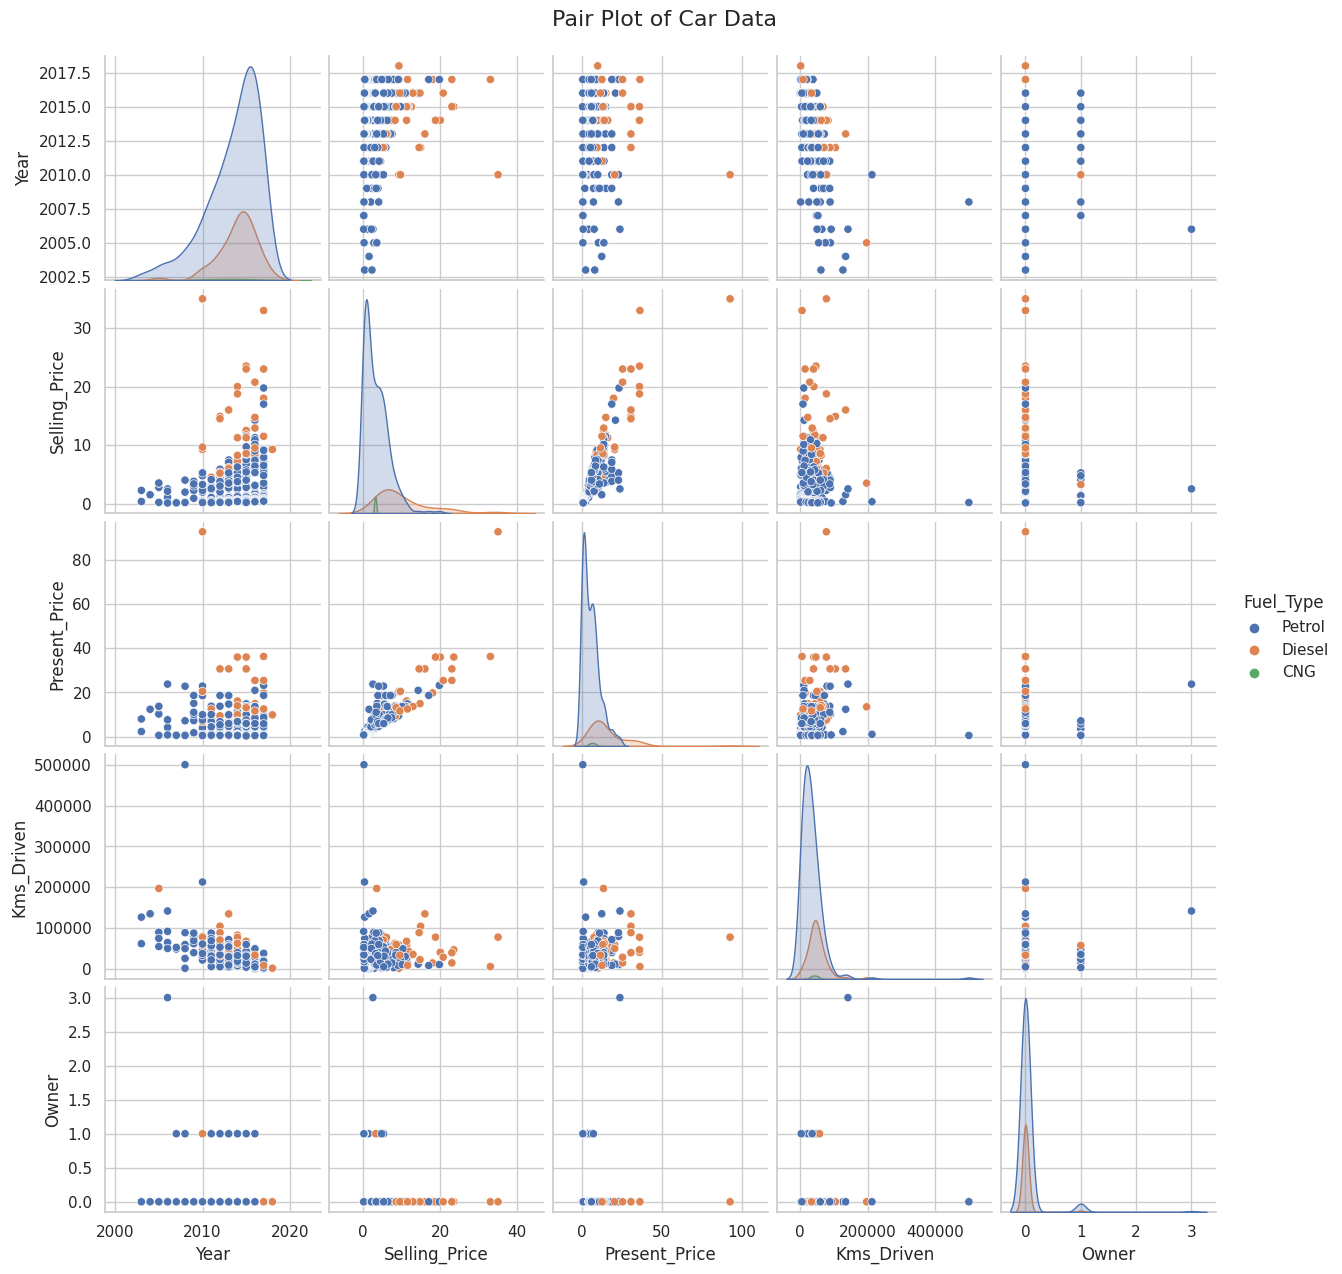

In [6]:
sns.set(style="whitegrid")
sns.pairplot(df, hue='Fuel_Type', height=2.5)
plt.suptitle("Pair Plot of Car Data", y=1.02, fontsize=16)
plt.show()

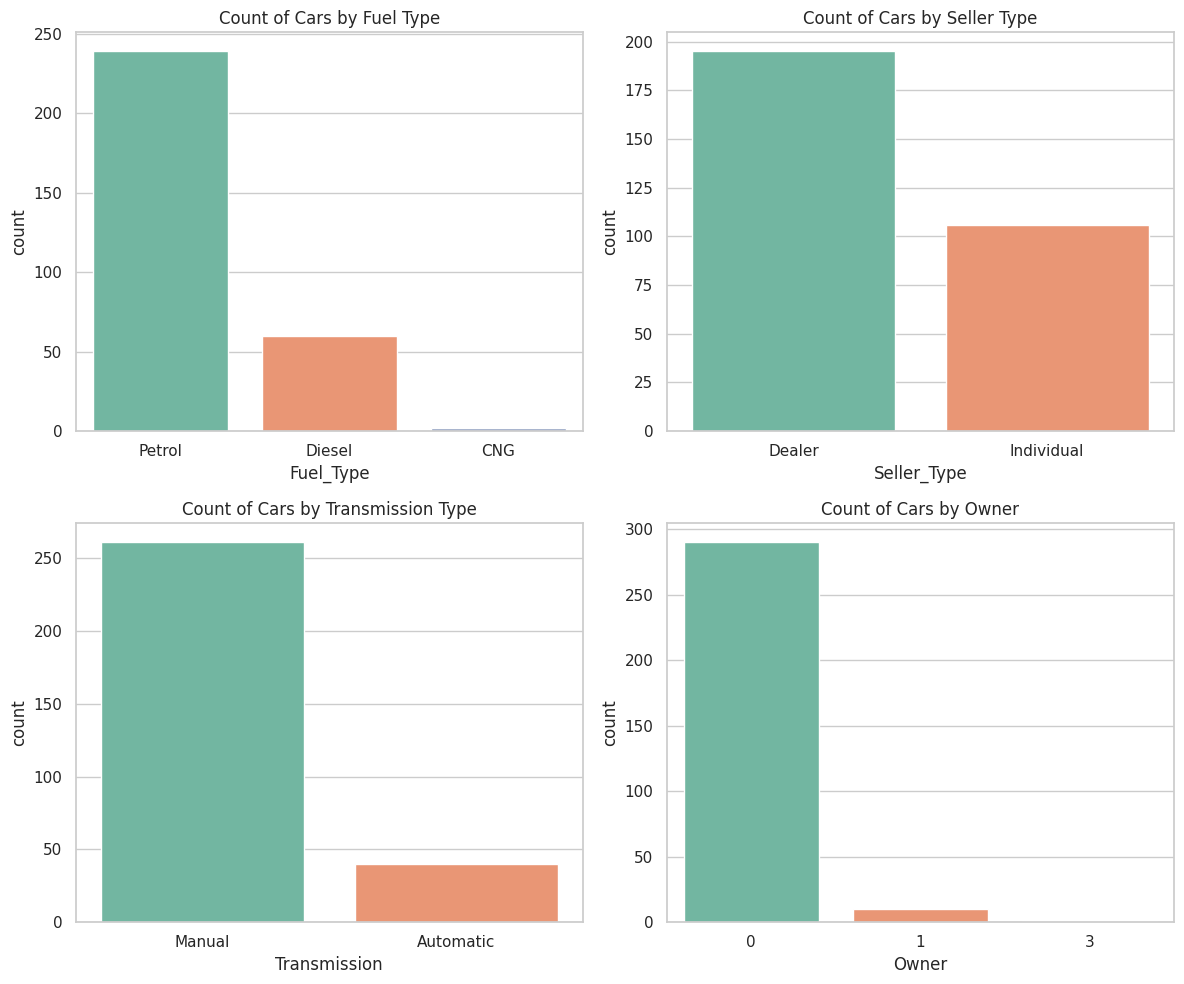

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.countplot(x='Fuel_Type', data=df, palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Count of Cars by Fuel Type')

sns.countplot(x='Seller_Type', data=df, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Count of Cars by Seller Type')

sns.countplot(x='Transmission', data=df, palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Count of Cars by Transmission Type')

sns.countplot(x='Owner', data=df, palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Count of Cars by Owner')

plt.tight_layout()
plt.show()

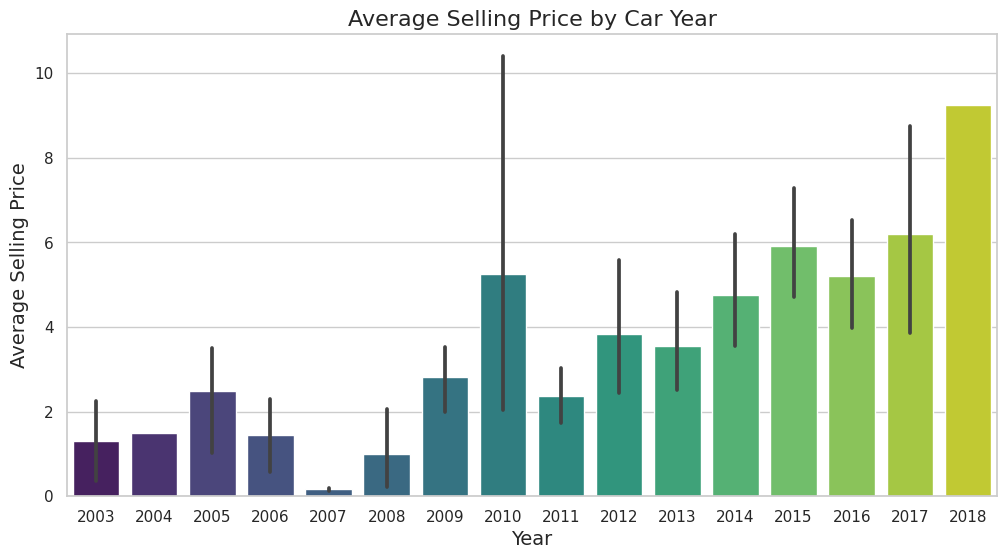

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Selling_Price', data=df, palette='viridis')
plt.title('Average Selling Price by Car Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Selling Price', fontsize=14)
plt.show()

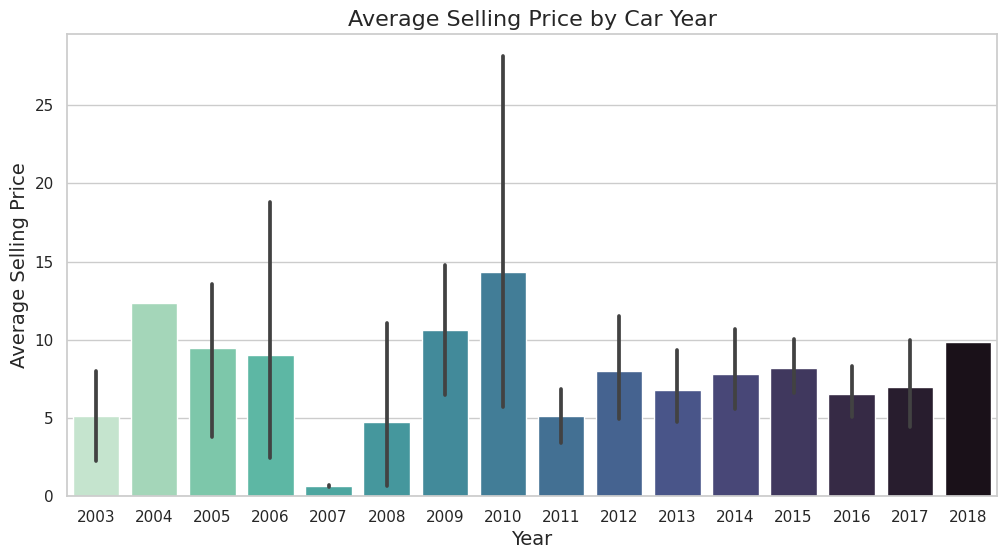

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Present_Price', data=df, palette='mako_r')
plt.title('Average Selling Price by Car Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Selling Price', fontsize=14)
plt.show()

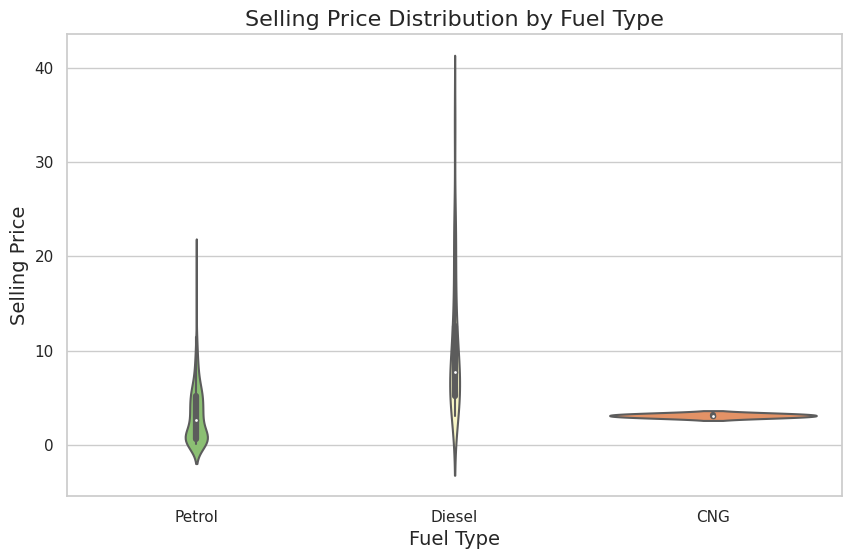

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Fuel_Type', y='Selling_Price', data=df, palette='RdYlGn_r')
plt.title('Selling Price Distribution by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.show()

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


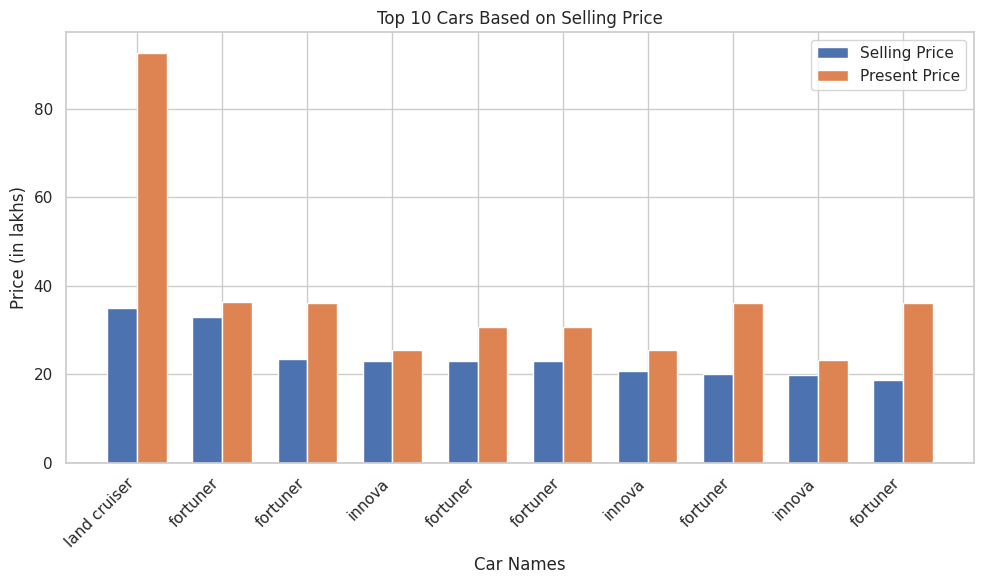

In [12]:
df_sorted = df.sort_values(by='Selling_Price', ascending=False)
top_10_df = df_sorted.head(10)

car_names = top_10_df['Car_Name']
selling_prices = top_10_df['Selling_Price']
present_prices = top_10_df['Present_Price']

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(car_names))

bar1 = ax.bar(index, selling_prices, bar_width, label='Selling Price')
bar2 = ax.bar([i + bar_width for i in index], present_prices, bar_width, label='Present Price')

ax.set_xlabel('Car Names')
ax.set_ylabel('Price (in lakhs)')
ax.set_title('Top 10 Cars Based on Selling Price')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(car_names, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

<a name="4"></a>
# **<h1 id="1" style="background-color:#2874A6;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">Model Building and Evaluation</h1>**

In [13]:
# Label Encoding categorical columns
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = label_encoder.fit_transform(df['Seller_Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

In [14]:
# Features and target
X = df[['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type', 'Seller_Type', 'Transmission']]
y = df['Selling_Price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a name="4.1"></a>
# **<h1 id="1" style="background-color:#2874A6;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">Random Forest Regressor</h1>**

In [16]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.88
R-squared: 0.96


In [19]:
feature_importance = model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importance)[::-1]

print("Feature ranking:")
for f in range(len(feature_names)):
    print(f"{feature_names[indices[f]]}: {feature_importance[indices[f]]}")

Feature ranking:
Present_Price: 0.8794738307269602
Year: 0.06044741350625483
Kms_Driven: 0.03596777513416475
Transmission: 0.014602894451257828
Fuel_Type: 0.006255806879064409
Seller_Type: 0.002399065101369306
Owner: 0.0008532142009287884


In [20]:
data_frame = {
    'Actual_Value': y_test,
    'Prediction_Value': y_pred
}

pred_vs_actu = pd.DataFrame(data_frame, columns=data_frame.keys())
print(pred_vs_actu.head())

     Actual_Value  Prediction_Value
177          0.35            0.4405
289         10.11           11.1112
228          4.95            4.8860
198          0.15            0.2076
60           6.95            7.6455


<a name="4.2"></a>
# **<h1 id="1" style="background-color:#2874A6;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">Gradient Boosting</h1>**

In [21]:
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

y_pred_gb = gradient_boosting_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Mean Squared Error (Gradient Boosting): {mse_gb:.2f}')
print(f'R-squared (Gradient Boosting): {r2_gb:.2f}')

Mean Squared Error (Gradient Boosting): 0.68
R-squared (Gradient Boosting): 0.97


In [22]:
data_frame_gb = {
    'Actual_Value': y_test,
    'Prediction_Value_GB': y_pred_gb
}

pred_vs_actu_gb = pd.DataFrame(data_frame_gb, columns=data_frame_gb.keys())
print(pred_vs_actu_gb.head())

     Actual_Value  Prediction_Value_GB
177          0.35             0.523404
289         10.11            10.588359
228          4.95             4.714816
198          0.15             0.271461
60           6.95             7.848483


<a name="4.3"></a>
# **<h1 id="1" style="background-color:#2874A6;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">Stacked Ensemble Model</h1>**

In [23]:
base_models = [
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42)),
]

In [24]:
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test)

mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f'Mean Squared Error (Stacking): {mse_stacking:.2f}')
print(f'R-squared (Stacking): {r2_stacking:.2f}')

Mean Squared Error (Stacking): 0.89
R-squared (Stacking): 0.96


In [25]:
data_frame_stacking = {
    'Actual_Value': y_test,
    'Prediction_Value_Stacking': y_pred_stacking
}

pred_vs_actu_stacking = pd.DataFrame(data_frame_stacking, columns=data_frame_stacking.keys())
print(pred_vs_actu_stacking.head())

     Actual_Value  Prediction_Value_Stacking
177          0.35                   0.088271
289         10.11                  11.835555
228          4.95                   4.981970
198          0.15                  -0.173997
60           6.95                   8.116465


<a name="4.4"></a>
# **<h1 id="1" style="background-color:#2874A6;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">Xtreme Gradient Boosting</h1>**

In [26]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Mean Squared Error (XGBoost): {mse_xgb:.2f}')
print(f'R-squared (XGBoost): {r2_xgb:.2f}')

Mean Squared Error (XGBoost): 0.89
R-squared (XGBoost): 0.96


In [27]:
data_frame_xgb = {
    'Actual_Value': y_test,
    'Prediction_Value_XGB': y_pred_xgb
}

pred_vs_actu_xgb = pd.DataFrame(data_frame_xgb, columns=data_frame_xgb.keys())
print(pred_vs_actu_xgb.head())

     Actual_Value  Prediction_Value_XGB
177          0.35              0.332672
289         10.11             11.679406
228          4.95              4.871466
198          0.15              0.373183
60           6.95              7.113964


<a name="5"></a>
# **<h1 id="1" style="background-color:#2874A6;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">Model Scores</h1>**

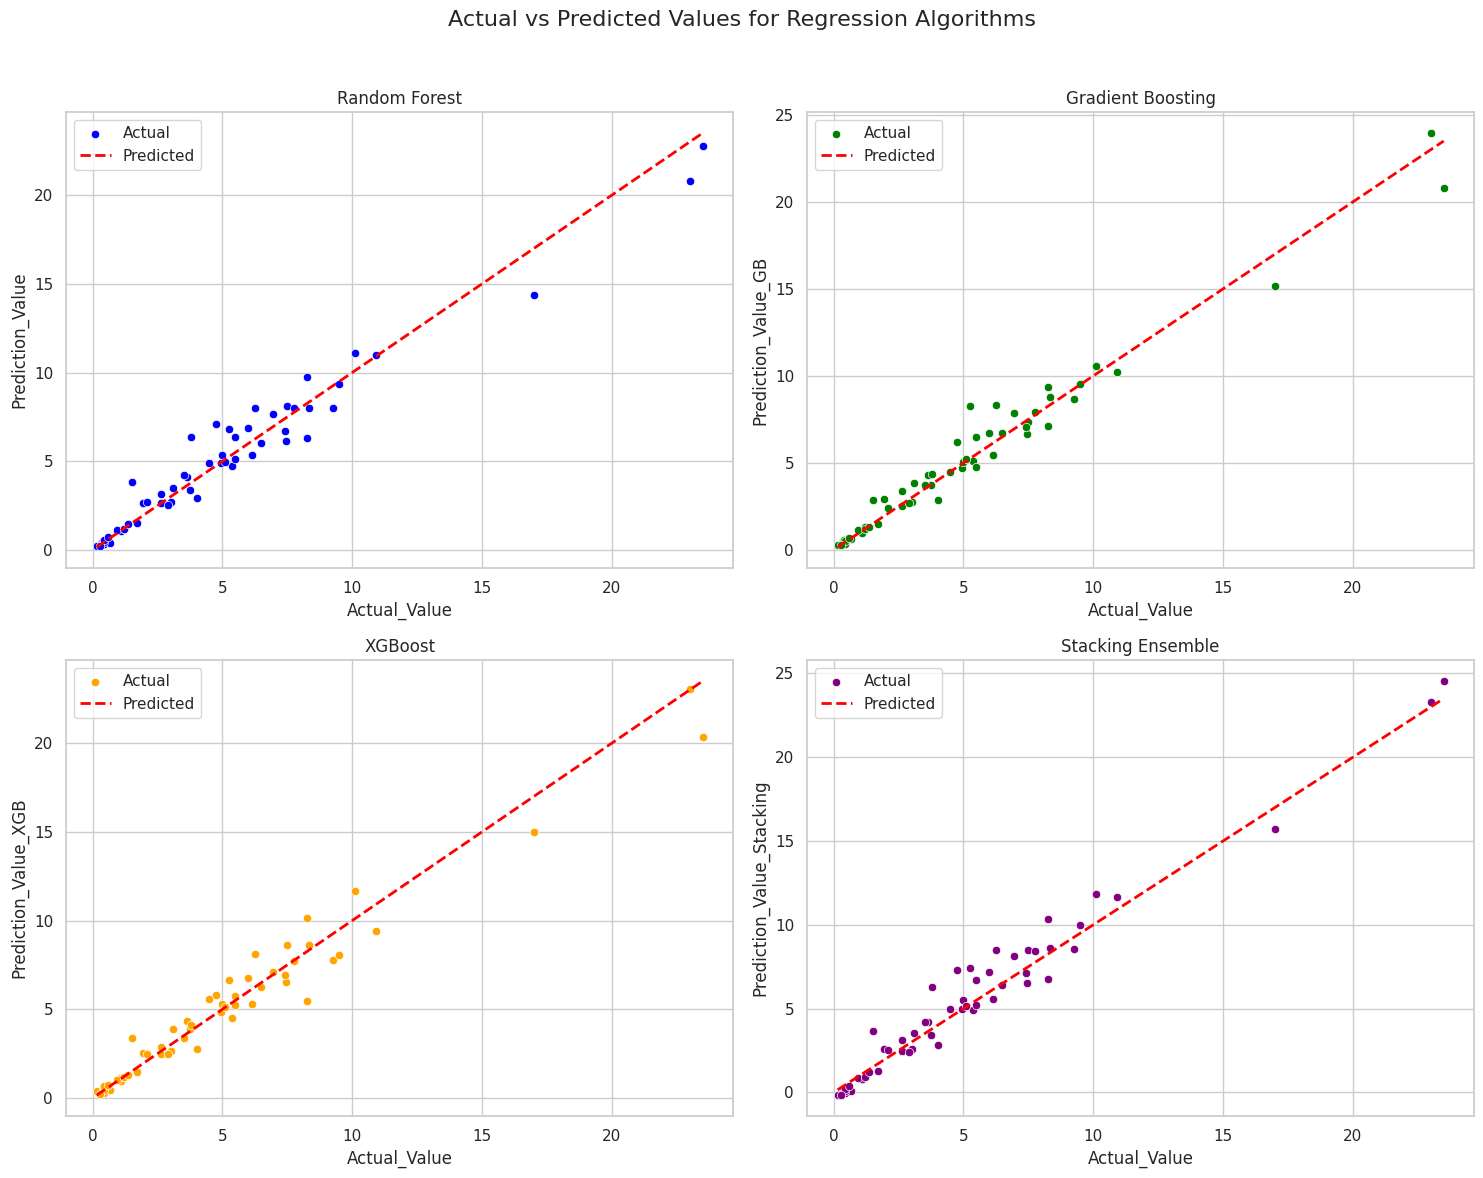

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Actual vs Predicted Values for Regression Algorithms', fontsize=16)

# Plot for Random Forest
sns.scatterplot(x='Actual_Value', y='Prediction_Value', data=pred_vs_actu, ax=axes[0, 0], color='blue', label='Actual')
axes[0, 0].plot([pred_vs_actu['Actual_Value'].min(), pred_vs_actu['Actual_Value'].max()],
                [pred_vs_actu['Actual_Value'].min(), pred_vs_actu['Actual_Value'].max()],
                linestyle='--', color='red', linewidth=2, label='Predicted')
axes[0, 0].set_title('Random Forest')
axes[0, 0].legend()

# Plot for Gradient Boosting
sns.scatterplot(x='Actual_Value', y='Prediction_Value_GB', data=pred_vs_actu_gb, ax=axes[0, 1], color='green', label='Actual')
axes[0, 1].plot([pred_vs_actu_gb['Actual_Value'].min(), pred_vs_actu_gb['Actual_Value'].max()],
                [pred_vs_actu_gb['Actual_Value'].min(), pred_vs_actu_gb['Actual_Value'].max()],
                linestyle='--', color='red', linewidth=2, label='Predicted')
axes[0, 1].set_title('Gradient Boosting')
axes[0, 1].legend()

# Plot for XGBoost
sns.scatterplot(x='Actual_Value', y='Prediction_Value_XGB', data=pred_vs_actu_xgb, ax=axes[1, 0], color='orange', label='Actual')
axes[1, 0].plot([pred_vs_actu_xgb['Actual_Value'].min(), pred_vs_actu_xgb['Actual_Value'].max()],
                [pred_vs_actu_xgb['Actual_Value'].min(), pred_vs_actu_xgb['Actual_Value'].max()],
                linestyle='--', color='red', linewidth=2, label='Predicted')
axes[1, 0].set_title('XGBoost')
axes[1, 0].legend()

# Plot for Stacking Ensemble
sns.scatterplot(x='Actual_Value', y='Prediction_Value_Stacking', data=pred_vs_actu_stacking, ax=axes[1, 1], color='purple', label='Actual')
axes[1, 1].plot([pred_vs_actu_stacking['Actual_Value'].min(), pred_vs_actu_stacking['Actual_Value'].max()],
                [pred_vs_actu_stacking['Actual_Value'].min(), pred_vs_actu_stacking['Actual_Value'].max()],
                linestyle='--', color='red', linewidth=2, label='Predicted')
axes[1, 1].set_title('Stacking Ensemble')
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()